In [33]:
import kagglehub
path = kagglehub.dataset_download("sumanthvrao/daily-climate-time-series-data")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/sumanthvrao/daily-climate-time-series-data/versions/3


In [34]:
import pandas as pd

try:
  data = pd.read_csv(path + '/DailyDelhiClimateTrain.csv')
  print(data.info())
  print(data.head())
  print(data.describe())
except FileNotFoundError:
  print(f"Error: File 'DailyDelhiClimateTrain.csv' not found in the specified directory: {path}")
except Exception as e:
  print(f"An error occurred: {e}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None
         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000
          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209 

In [35]:
import kagglehub
import pandas as pd
import os
import numpy as np

for filename in os.listdir(path):
    if filename.endswith(".csv"):
        filepath = os.path.join(path, filename)
        try:
            df = pd.read_csv(filepath)
            print("\nDataset Overview:")
            print(df.head())
            print("\nData Types:")
            print(df.dtypes)
            print("\nDescriptive Statistics:")
            print(df.describe())
            print("\nShape of the dataset:", df.shape)
            print("\nColumn Names:", df.columns)
            print("\nMissing Values (before handling):")
            print(df.isnull().sum())

            for col in df.columns:
                if df[col].isnull().any():
                  if pd.api.types.is_numeric_dtype(df[col]):
                      df[col].fillna(df[col].mean(), inplace=True)
                  else:
                      df[col].fillna(df[col].mode()[0], inplace=True)


            print("\nMissing Values (after handling):")
            print(df.isnull().sum())
            break

        except pd.errors.ParserError:
            print(f"Error parsing {filename}. Skipping this file.")
        except Exception as e:
            print(f"An error occurred while processing {filename}: {e}")
else:
    print(f"No CSV files found in the downloaded dataset at {path}")


Dataset Overview:
         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000

Data Types:
date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

Descriptive Statistics:
          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72

In [36]:
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        filepath = os.path.join(path, filename)
        try:
            df = pd.read_csv(filepath)
            numerical_cols = df.select_dtypes(include=np.number).columns
            for col in numerical_cols:
                print(f"\nStatistics for column '{col}':")
                print(f"  Mean: {df[col].mean()}")
                print(f"  Median: {df[col].median()}")
                print(f"  Standard Deviation: {df[col].std()}")

            break

        except pd.errors.ParserError:
            print(f"Error parsing {filename}. Skipping this file.")
        except Exception as e:
            print(f"An error occurred while processing {filename}: {e}")
else:
    print(f"No CSV files found in the downloaded dataset at {path}")


Statistics for column 'meantemp':
  Mean: 25.495520655761762
  Median: 27.714285714285715
  Standard Deviation: 7.348102725432476

Statistics for column 'humidity':
  Mean: 60.77170158004638
  Median: 62.625
  Standard Deviation: 16.769652268485302

Statistics for column 'wind_speed':
  Mean: 6.802208747447473
  Median: 6.221666666666667
  Standard Deviation: 4.561602164272007

Statistics for column 'meanpressure':
  Mean: 1011.1045475940377
  Median: 1008.563492063492
  Standard Deviation: 180.2316683392097


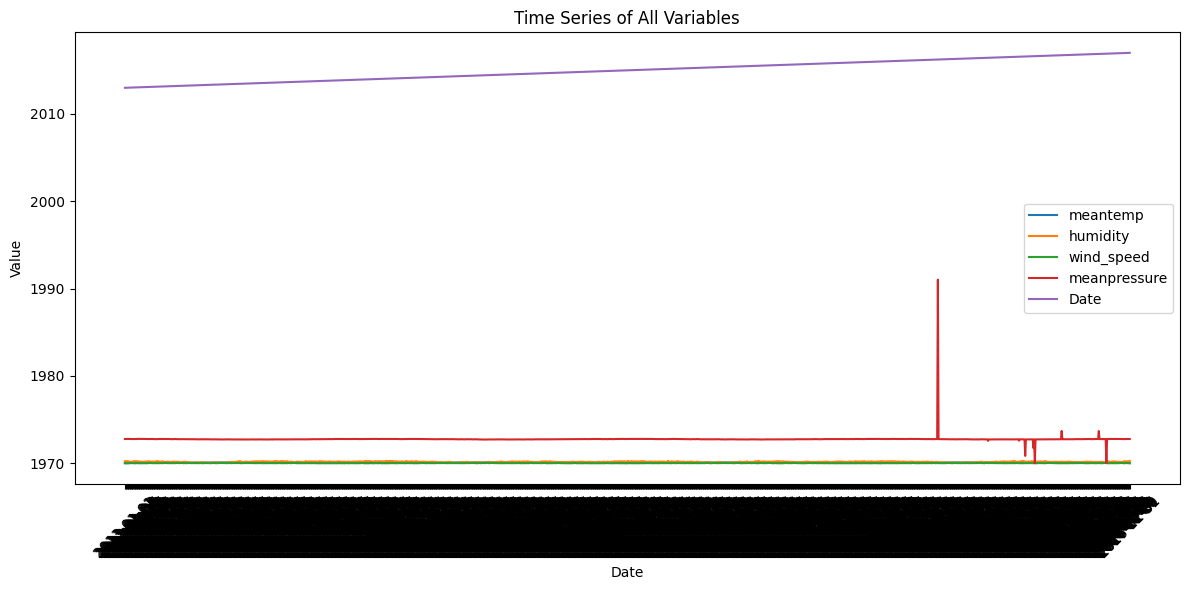

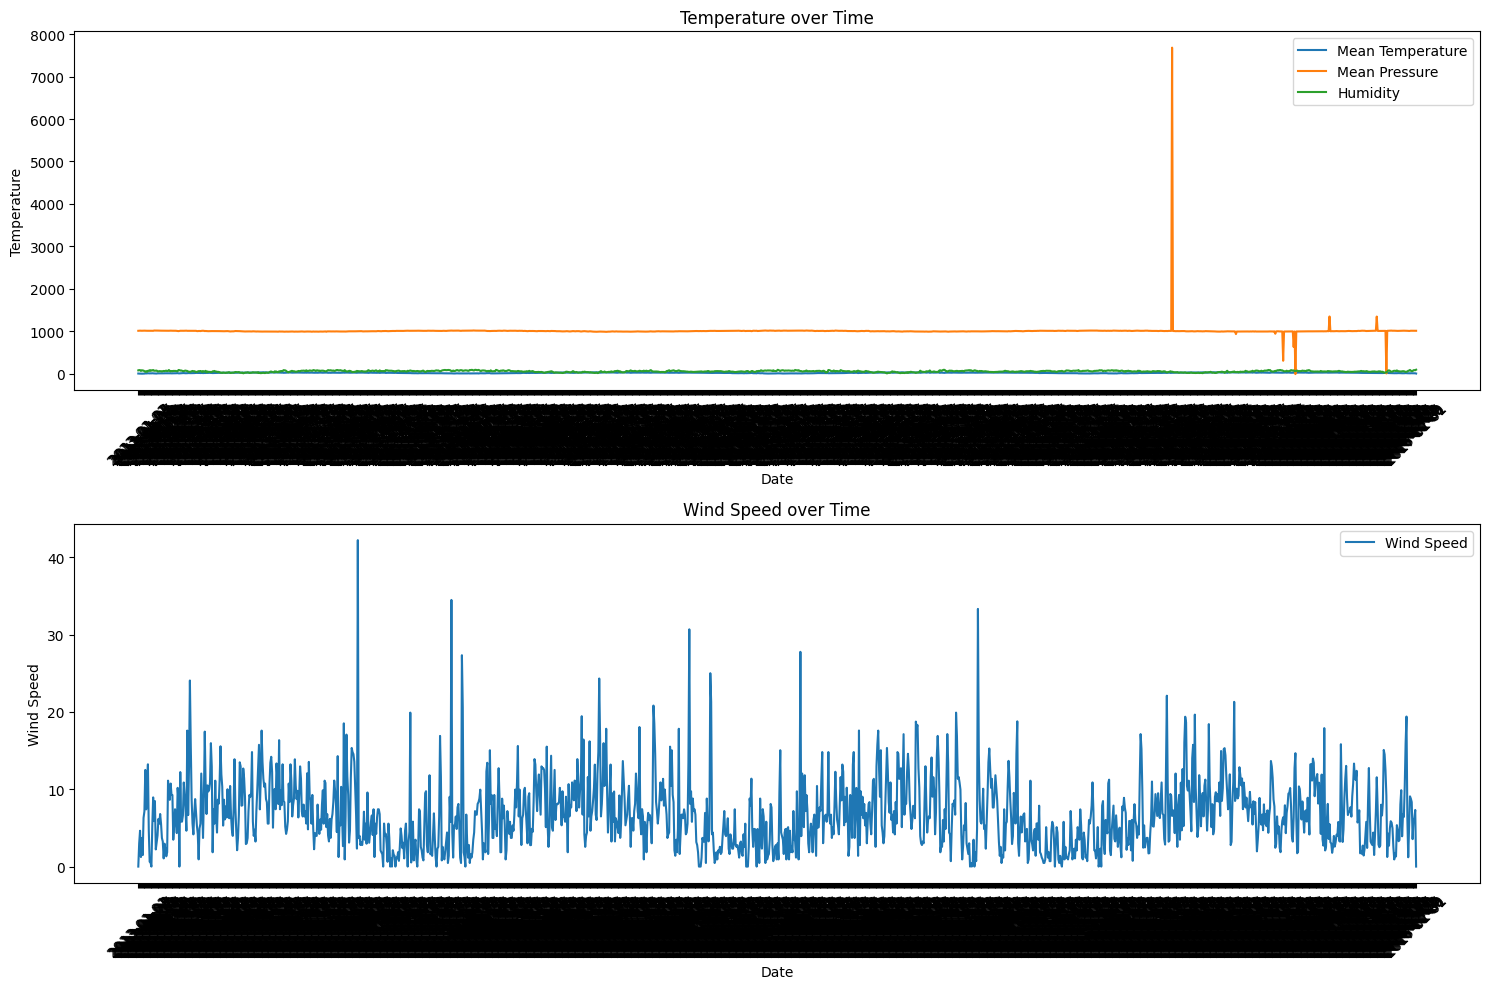

In [37]:
import matplotlib.pyplot as plt
try:
    df['Date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')
    plt.figure(figsize=(12, 6))
    for col in df.columns:
        plt.plot(df.index, df[col], label=col)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Time Series of All Variables')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 1, 1)
    plt.plot(df.index, df['meantemp'], label='Mean Temperature')
    plt.plot(df.index, df['meanpressure'], label='Mean Pressure')
    plt.plot(df.index, df['humidity'], label='Humidity')
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.title('Temperature over Time')
    plt.legend()
    plt.xticks(rotation=45)

    plt.subplot(2, 1, 2)
    plt.plot(df.index, df['wind_speed'], label='Wind Speed')
    plt.xlabel('Date')
    plt.ylabel('Wind Speed')
    plt.title('Wind Speed over Time')
    plt.legend()
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

except KeyError as e:
    print(f"Error: Column '{e}' not found in the DataFrame. Please check your data.")
except Exception as e:
    print(f"An error occurred: {e}")

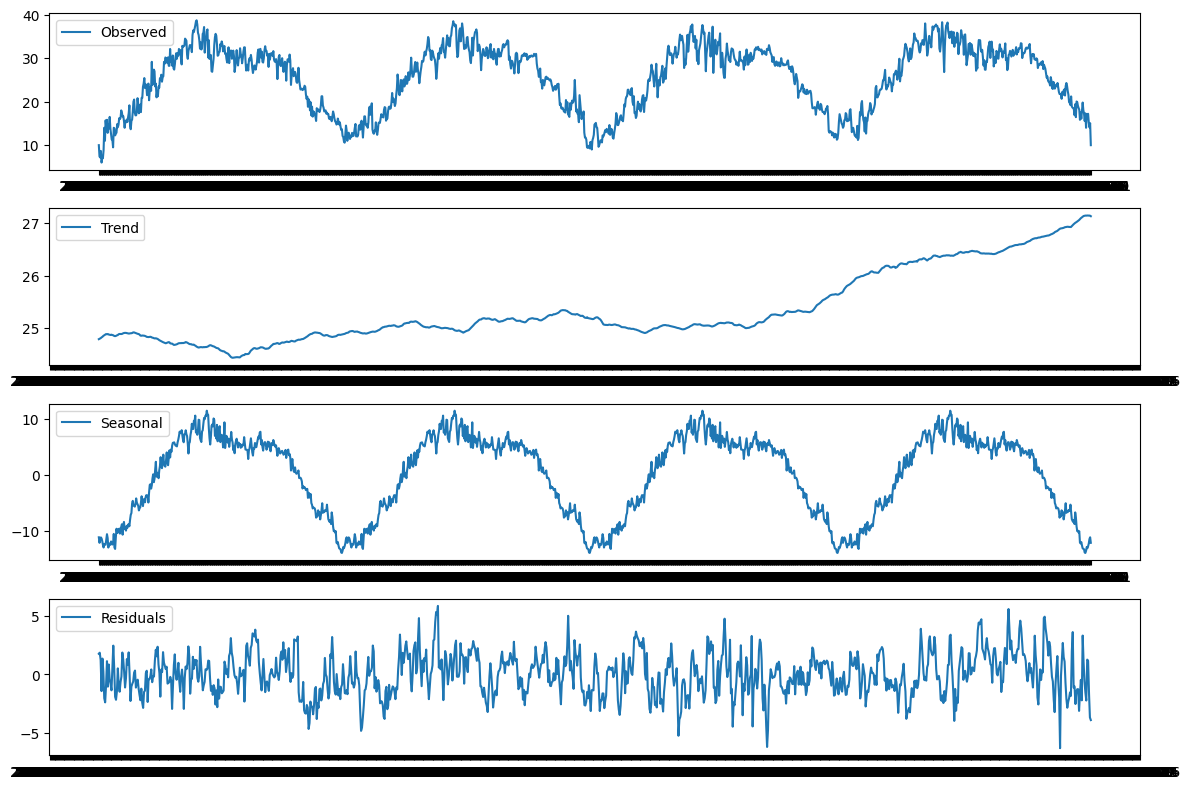

Seasonal component:
date
2013-01-01   -11.112191
2013-01-02   -12.097390
2013-01-03   -11.386488
2013-01-04   -11.134559
2013-01-05   -11.317170
2013-01-06   -11.787341
2013-01-07   -12.427595
2013-01-08   -12.935191
2013-01-09   -12.291562
2013-01-10   -12.355111
Name: seasonal, dtype: float64


In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
try:
    decomposition = seasonal_decompose(df['meantemp'], model='additive', period=365)
    plt.figure(figsize=(12, 8))
    plt.subplot(411)
    plt.plot(decomposition.observed, label='Observed')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend')
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonal')
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residuals')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
    print("Seasonal component:")
    print(decomposition.seasonal.head(10))
except KeyError as e:
    print(f"Error: Column '{e}' not found in the DataFrame. Please check your data.")
except Exception as e:
    print(f"An error occurred during time series decomposition: {e}")